In [1]:
import dataloaders
import logging
import matplotlib.pyplot as plt
import numpy as np
import models.unetModel
import models.vggModel


if __name__ == '__main__':

    logging.getLogger().setLevel(logging.WARNING)

    ds_train, ds_test = dataloaders.DataSetLoader('temp/ICBHI_final_database', 44100, 0, 20, extend_to_three_channels=False).create_dataset(16, 0.8)

    for mfcc, label in ds_train.take(1):
        print(mfcc.shape)
        print(label.shape)

    # model = models.unetModel.create_model_smaller(input_shape=(128, 512, 1), dense_top=True)    
    model = models.unetModel.create_model_big(input_shape=(128, 512, 1), dense_top=True)
    # model = models.vggModel.create_vgg(input_shape=(128, 512, 3))

    # Kompilacja modelu
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

    # Trenowanie modelu
    history = model.fit(ds_train, epochs=10)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
2024-05-21 22:35:14.737492: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(16, 128, 512, 1)
(16,)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 512, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 512, 64  36928       ['conv2d[0][0]']                 
                                )                                     

In [2]:

    # Wyświetlenie wyników treningu
    print("Historia treningu:", history.history)
    

Historia treningu: {'loss': [1108.127685546875, 1.3445277214050293, 1.3401248455047607, 1.331766128540039, 1.3248299360275269, 1.3357527256011963, 3.652463436126709, 1.3389240503311157, 1.3264583349227905, 1.3181670904159546], 'accuracy': [0.27853259444236755, 0.3288043439388275, 0.33423912525177, 0.364130437374115, 0.37635868787765503, 0.38451087474823, 0.31929346919059753, 0.32472825050354004, 0.39809781312942505, 0.3913043439388275]}


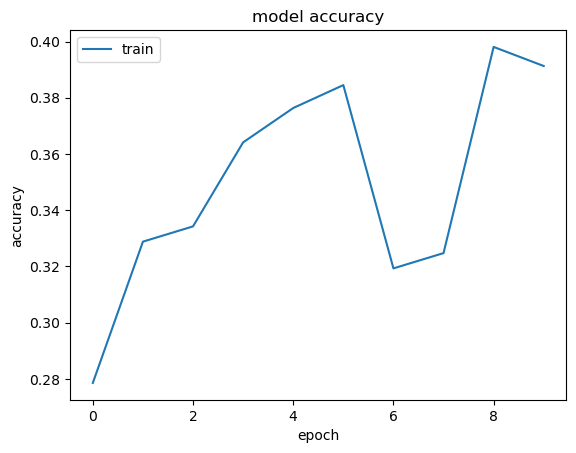

In [4]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

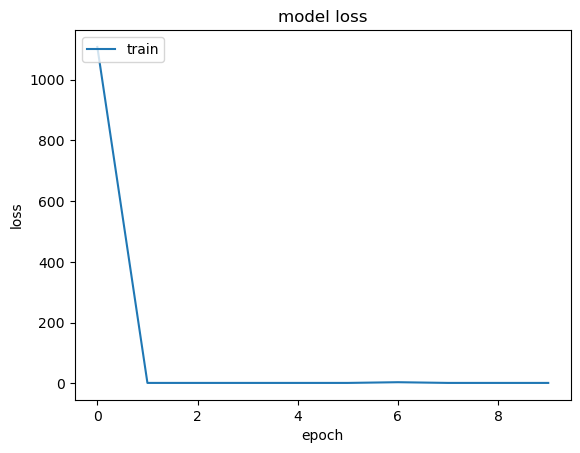

In [5]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

17/46 [==========>...................] - ETA: 2:07

KeyboardInterrupt: 